# Explore Basis Trade Data


In [51]:
import pandas as pd
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set()

# Import project configurations
from settings import config
import load_bases_data

# Retrieve directory paths from the configuration
DATA_DIR = config("DATA_DIR")
MANUAL_DATA_DIR = config("MANUAL_DATA_DIR")


In [52]:
from settings import config
print(config("DATA_DIR"))
print(config("OUTPUT_DIR"))
# print(config("WRDS_USERNAME"))

/Users/jameschen/FINM-32900-Final-Projcet-12-1/_data
/Users/jameschen/FINM-32900-Final-Projcet-12-1/_output


In [68]:

df = load_bases_data.load_combined_spreads_wide(data_dir=MANUAL_DATA_DIR)

df = df.ffill(limit=5).dropna()

print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1923 entries, 2011-09-27 to 2020-10-06
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Box_06m            1923 non-null   float32
 1   Box_12m            1923 non-null   float32
 2   Box_18m            1923 non-null   float32
 3   CDS_Bond_HY        1923 non-null   float32
 4   CDS_Bond_IG        1923 non-null   float32
 5   CIP_AUD            1923 non-null   float32
 6   CIP_CAD            1923 non-null   float32
 7   CIP_CHF            1923 non-null   float32
 8   CIP_EUR            1923 non-null   float32
 9   CIP_GBP            1923 non-null   float32
 10  CIP_JPY            1923 non-null   float32
 11  CIP_NZD            1923 non-null   float32
 12  CIP_SEK            1923 non-null   float32
 13  Eq_SF_Dow          1923 non-null   float32
 14  Eq_SF_NDAQ         1923 non-null   float32
 15  Eq_SF_SPX          1923 non-null   float32
 16  TIPS_T

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1923 entries, 2011-09-27 to 2020-10-06
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Box_06m            1923 non-null   float32
 1   Box_12m            1923 non-null   float32
 2   Box_18m            1923 non-null   float32
 3   CDS_Bond_HY        1923 non-null   float32
 4   CDS_Bond_IG        1923 non-null   float32
 5   CIP_AUD            1923 non-null   float32
 6   CIP_CAD            1923 non-null   float32
 7   CIP_CHF            1923 non-null   float32
 8   CIP_EUR            1923 non-null   float32
 9   CIP_GBP            1923 non-null   float32
 10  CIP_JPY            1923 non-null   float32
 11  CIP_NZD            1923 non-null   float32
 12  CIP_SEK            1923 non-null   float32
 13  Eq_SF_Dow          1923 non-null   float32
 14  Eq_SF_NDAQ         1923 non-null   float32
 15  Eq_SF_SPX          1923 non-null   float32
 16  TIPS_T

In [55]:
df.tail()

,Box_06m,Box_12m,Box_18m,CDS_Bond_HY,CDS_Bond_IG,CIP_AUD,CIP_CAD,CIP_CHF,CIP_EUR,CIP_GBP,...,Treasury_SF_10Y,Treasury_SF_20Y,Treasury_SF_30Y,Treasury_Swap_01Y,Treasury_Swap_02Y,Treasury_Swap_03Y,Treasury_Swap_05Y,Treasury_Swap_10Y,Treasury_Swap_20Y,Treasury_Swap_30Y
date,,,,,,,,,,,,,,,,,,,,,
2020-09-30,40.555565,43.011848,41.711506,-136.982651,-18.245064,15.268238,36.371628,38.716438,35.219608,25.638702,...,13.161999,-23.264000,-14.365,-6.38,-9.4,-11.55,-13.6,-18.600000,-36.599998,-52.000000
2020-10-01,40.869366,43.152840,43.448586,-136.982651,-18.245064,11.937216,35.248646,34.527248,32.096199,24.128174,...,12.193999,-21.952999,-14.365,-6.20,-9.9,-10.80,-12.4,-18.100000,-37.900002,-52.500000
2020-10-02,40.517254,43.098312,42.546875,-136.982651,-18.245064,15.168867,33.604782,32.835171,31.647871,23.152693,...,8.674000,-26.825001,-14.365,-6.09,-9.0,-11.20,-12.7,-18.299999,-37.700001,-53.400002
2020-10-05,39.706650,43.044472,43.061104,-136.982651,-18.245064,11.945726,31.510820,32.519932,31.641478,22.843588,...,9.759999,-25.424000,-14.365,-5.76,-8.8,-12.10,-13.3,-19.200001,-38.400002,-54.799999
2020-10-06,39.934700,43.194530,43.193279,-136.982651,-18.245064,16.054800,30.344168,29.901834,29.395243,20.840437,...,4.132000,-35.338001,-14.365,-7.67,-8.7,-10.70,-15.0,-21.400000,-43.099998,-58.599998


In [ ]:
import pandas as pd

# Load the dataset (assuming df is already loaded in your environment)
# df = pd.read_csv('your_data.csv', index_col=0, parse_dates=True)

# Generate summary statistics
summary_statistics = df.describe().transpose()

# Convert summary statistics to LaTeX table format
latex_table = summary_statistics.to_latex(float_format="%.2f", caption="Summary Statistics of Treasury Spot-Futures Arbitrage Variables", label="tab:summary_statistics")

# Save LaTeX table to a file in the 'report' folder
with open("reports/summary_statistics.tex", "w") as f:
    f.write(latex_table)


summary_statistics

,count,mean,std,min,25%,50%,75%,max
Box_06m,1923.0,36.852818,9.007847,-0.018027,30.508753,35.916817,41.143492,87.263367
Box_12m,1923.0,35.264954,8.424192,1.865126,28.568614,34.396667,40.369110,67.855972
Box_18m,1923.0,37.854115,10.405821,-15.891914,30.896338,36.992733,43.437344,81.735664
CDS_Bond_HY,1923.0,-66.931465,45.971237,-367.481812,-91.102806,-54.411697,-34.343136,9.644402
CDS_Bond_IG,1923.0,-23.709293,21.271534,-248.385025,-27.724449,-18.881210,-12.179390,5.057480
CIP_AUD,1923.0,-11.376144,13.672273,-58.537903,-17.864628,-11.201332,-2.747546,28.373337
CIP_CAD,1923.0,14.333656,11.630356,-11.268407,5.037762,10.785297,22.685478,67.894264
CIP_CHF,1923.0,53.499001,26.657320,12.693802,29.568359,52.139786,69.060291,198.407974
CIP_EUR,1923.0,38.277359,21.647913,-0.727621,22.617358,36.776642,49.408928,150.350601
CIP_GBP,1923.0,19.291771,14.386133,1.031465,7.378039,15.719533,26.997292,105.829247


In [57]:
# Reindex columns in sorted order and filter only columns that match the pattern "Treasury_SF_*"
filtered_df = df.reindex(sorted(df.columns), axis=1).filter(regex="^Treasury_SF_")

# Display dataset information
print(filtered_df.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1923 entries, 2011-09-27 to 2020-10-06
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Treasury_SF_02Y  1923 non-null   float32
 1   Treasury_SF_05Y  1923 non-null   float32
 2   Treasury_SF_10Y  1923 non-null   float32
 3   Treasury_SF_20Y  1923 non-null   float32
 4   Treasury_SF_30Y  1923 non-null   float32
dtypes: float32(5)
memory usage: 52.6 KB
None


### ONly this Graph


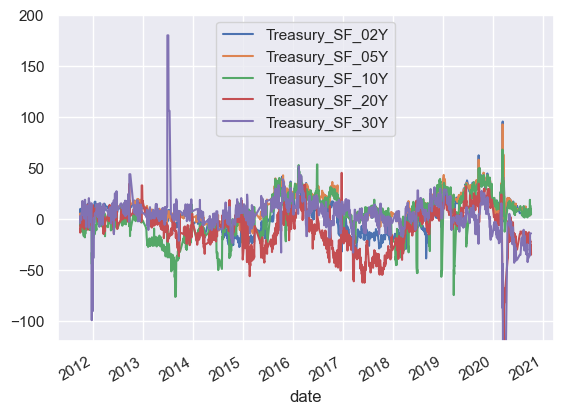

In [58]:
# Reindex columns in sorted order and filter only columns that match the pattern "Treasury_SF_*"
filtered_df = df.reindex(sorted(df.columns), axis=1).filter(regex="^Treasury_SF_")

# Plot the filtered data
filtered_df.plot()

# Set y-axis limits
plt.ylim(-120, 200)

# Show the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

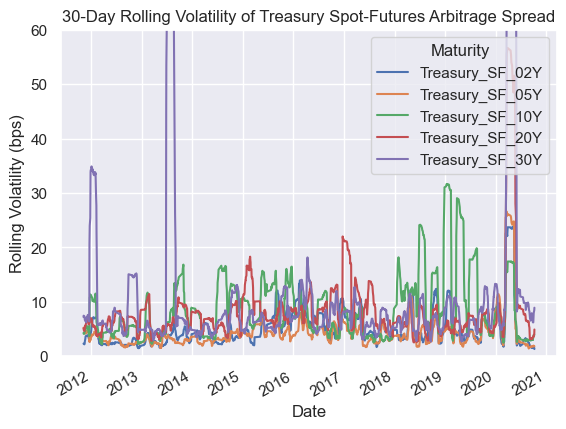

In [59]:
# Compute rolling 30-day standard deviation (volatility)
rolling_volatility = filtered_df.rolling(window=30).std()

# Plot rolling volatility
plt.figure(figsize=(10,6))
rolling_volatility.plot()

# Set plot title and labels
plt.title("30-Day Rolling Volatility of Treasury Spot-Futures Arbitrage Spread")
plt.xlabel("Date")
plt.ylabel("Rolling Volatility (bps)")
plt.ylim(0, 60)

# Show legend
plt.legend(title="Maturity", loc="upper right")

# Show the plot
plt.show()